Importing Necessary Modules

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np



Loading the Datasets

In [2]:
test_set = pd.read_csv('imageRecognition/mnist_test.csv')
train_set = pd.read_csv('imageRecognition/mnist_train.csv') 

Familiarizing with the Datasets

In [3]:
print(test_set)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [4]:
print(train_set)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

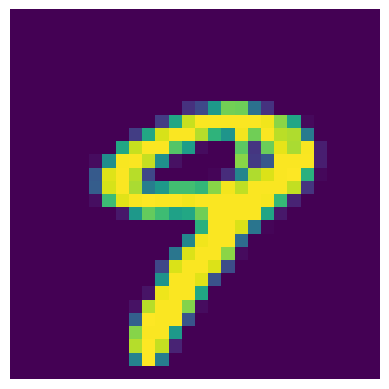

9


In [5]:
row_index = 9  

image_pixel_values = test_set.iloc[row_index, 1:] 

# Reshape the pixel values into a 28x28 array
image_array = image_pixel_values.values.reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_set.iloc[row_index,0])

Spliting Images and Labels in Train and Test Sets

In [24]:
train_x = np.log1p(train_set.drop('label' , axis = 1))
test_x = np.log1p(test_set.drop('label' , axis = 1))
train_y = train_set['label']
test_y = test_set['label']

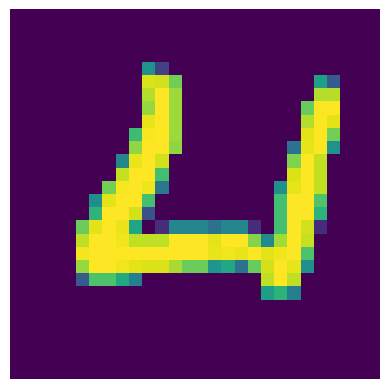

4


In [26]:
# Extract the pixel values for the chosen image
image_pixel_values = test_x.iloc[33,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = np.array(image_pixel_values).reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array)  
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_y[33])

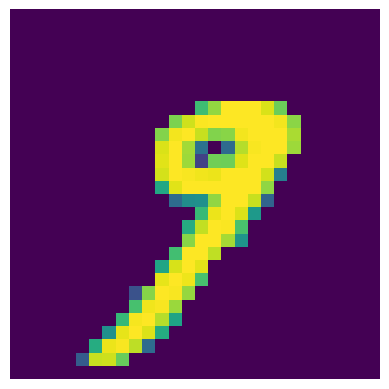

9


In [27]:
# Extract the pixel values for the chosen image
image_pixel_values = train_x.iloc[33,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = np.array(image_pixel_values).reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(train_y[33])

Initial Skewness: 1.7009873377900953
Transformed Skewness: 1.622158987903982


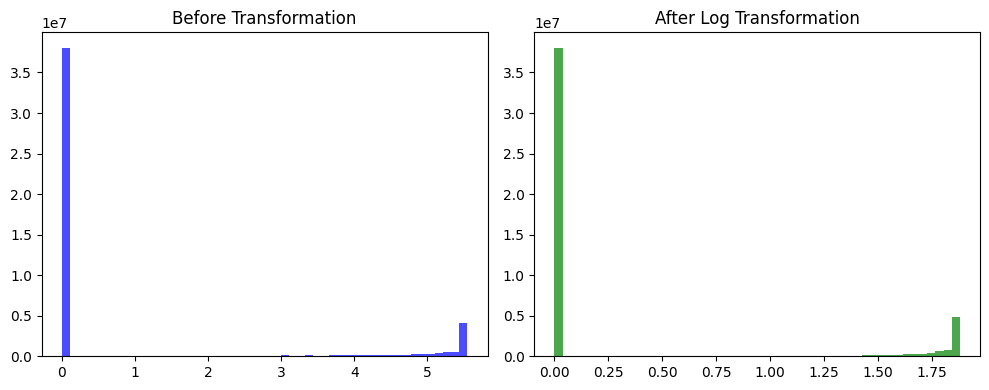

In [30]:
from scipy.stats import skew
all_pixel_values_train = np.array(train_x).flatten()

# Calculate skewness before transformation
initial_skewness_train = skew(all_pixel_values_train)
print(f"Initial Skewness: {initial_skewness_train}")

# Apply logarithm transformation
transformed_pixel_values_train = np.log1p(all_pixel_values_train)

# Calculate skewness after transformation
transformed_skewness_train = skew(transformed_pixel_values_train)
print(f"Transformed Skewness: {transformed_skewness_train}")

# Plot histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_pixel_values_train, bins=50, color='blue', alpha=0.7)
plt.title('Before Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_pixel_values_train, bins=50, color='green', alpha=0.7)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()

Initial Skewness: 1.687129941766621
Transformed Skewness: 1.60915589250484


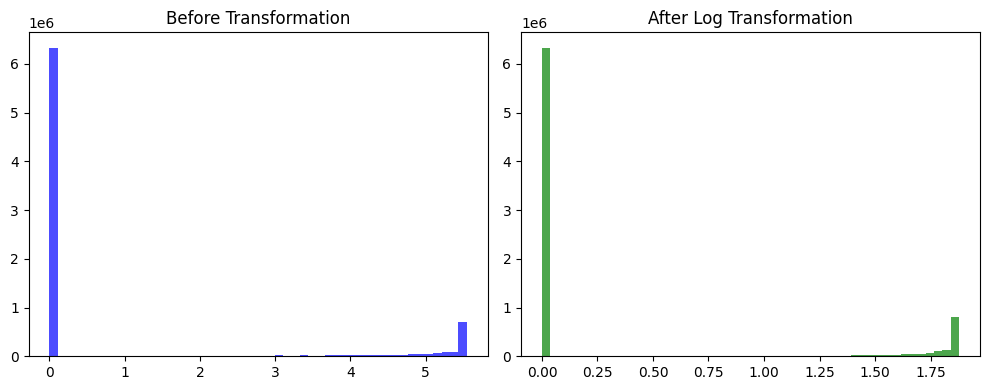

In [31]:
all_pixel_values_test = np.array(test_x).flatten()

# Calculate skewness before transformation
initial_skewness_test = skew(all_pixel_values_test)
print(f"Initial Skewness: {initial_skewness_test}")

# Apply logarithm transformation
transformed_pixel_values_test = np.log1p(all_pixel_values_test)

# Calculate skewness after transformation
transformed_skewness_test = skew(transformed_pixel_values_test)
print(f"Transformed Skewness: {transformed_skewness_test}")

# Plot histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_pixel_values_test, bins=50, color='blue', alpha=0.7)
plt.title('Before Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_pixel_values_test, bins=50, color='green', alpha=0.7)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()

Train the Model 

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(train_x, train_y)




RandomForestClassifier(random_state=42)

Predict and Calculate Model Accuracy


In [33]:
from sklearn.metrics import accuracy_score

y_predict = clf.predict(test_x)


accuracy = accuracy_score(test_y, y_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


C:\Users\ammar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


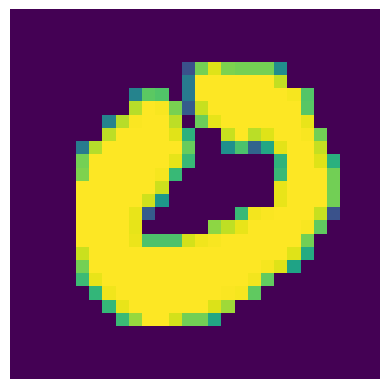

Real Label : 0
Predicted Label : [0]


In [55]:
image = test_x.iloc[25,:]
real_label = test_y.iloc[25]


# Reshape the pixel values into a 28x28 array
image_array = np.array(image).reshape(28, 28)

pred_label = clf.predict(image.values.reshape(1, -1))
# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(f"Real Label : {real_label}")
print(f"Predicted Label : {pred_label}")